# Supplementary Figures

In [32]:
%load_ext autoreload
%autoreload 2

import numpy as np
import glob
import pandas as pd

# Plotting (set font)
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import matplotlib.pyplot as plt

import salt
import pe
import plot

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from bokeh.io import output_notebook
from bokeh.plotting import show

from importlib import reload
reload(salt)
reload(pe)

output_notebook()


# USER PARAMETERS
save_folder = '../PAPERS/ccls/figs/n_100/'
Z = 1 # charge per monomer (same for polyanion and polycation)
# range of temperatures considered (liquid water) [K]
T_range = [273, 373]
# list of salt [KBr] concentrations [mol/L]
rho_s_list = [1.75, 2.0, 2.05]
# list of polyanion [PSS] concentrations [mol/L]
rho_p_list = [0.15, 0.3]
# accurate choice for sigma based on Bjerrum length of water (see Zhang et al. 2016)
sigma = 4.1E-10 # [m]
# degree of polymerization
N = 100
# conversion of meters to Angstroms [A]
m_2_A = 1E10
# conversion from beads/sigma^3 to mol/L (M)
beads_2_M = pe.get_beads_2_M(sigma*m_2_A)
# naming structures
mu_naming_structure = 'NA(100)NB(100)lB(*)f(1.000)'

K_2_C = 273.15

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

## S1: Bjerrum Length vs. Temperature

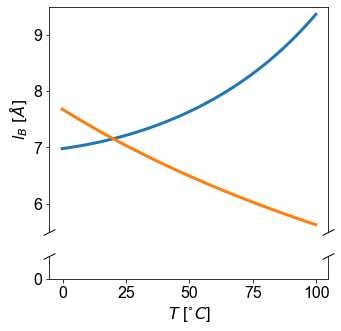

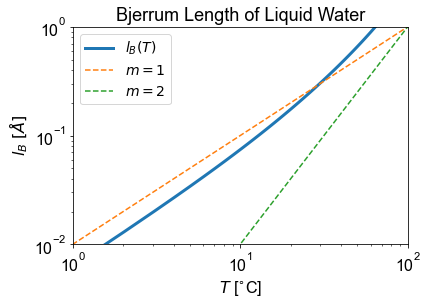

In [57]:
fig = plot.figs1(T_range, sigma)

plt.savefig(save_folder + 'figs1.svg', bbox_inches='tight')

In [ ]:
##########################################################################################
# LOG SCALE -- for fun, not used in paper

# plots Bjerrum Length vs. Temperature
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(T_arr - T_arr[0], lB_A_arr - lB_A_arr[0], lw=3, label=r'$l_B(T)$')

# slope of 1
x = np.linspace(0, 100, 1000)
y = x/1E2
ax.plot(x, y, '--', label=r'$m=1$')

# slope of 2
y = x**2/1E4
ax.plot(x, y, '--', label=r'$m=2$')


# formats plot
ax.set_xlabel(r'$T$ [$^{\circ}$C]', fontsize=ax_fs)
ax.set_ylabel(r'$l_B$ $[\AA]$', fontsize=ax_fs)
ax.set_title('Bjerrum Length of Liquid Water', fontsize=t_fs)
ax.tick_params(axis='both', labelsize=tk_fs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 100])
ax.set_ylim([0.01, 1])
plt.legend(fontsize=l_fs)

## S2: Phase Diagram of VO Theory

In [58]:
### DATA PARAMETERS ###
# folder with binodal data
data_folder = '../vo/vo_chris/' # must contain mu in .PD file
# extension for data file, including period
ext = '.PD'
# concentration of salt in reservoir [mol/L]
rho_salt_M = 6.8
# converts to beads/sigma^3
rho_salt = rho_salt_M/beads_2_M
# folder with chemical potential calculations for salt solution
mu_salt_folder = data_folder
### FORMATTING PARAMETERS ###
# number of points to have in plot
n_pts = 50000
# parameter to plot for z axis
z_name = 'T [C]'
# binodal at fixed temperature
z_rough = 10
# range of Bjerrum lengths to plot
lB_lo = 1.702
lB_hi = 2.065
# bead size [m]
sigma = 4.1E-10
# values at which to outline binodal surface
T_for_outline = [-1, 80]
rho_s_for_outline = []

In [59]:
# loads data
data = salt.load_data(data_folder, ext=ext,
                lB_lo=lB_lo, lB_hi=lB_hi, num_rows_hdr=0)

In [60]:
# extracts data for plot
data_3d, data_mu, data_z, data_cp, data_outlines = salt.data_fig1(data, mu_salt_folder, rho_salt, T_range, 
                                                    sigma, z_name, beads_2_M, n_pts, z_rough, ext=ext, 
                                                   num_rows_hdr=0, lB_lo=lB_lo, lB_hi=lB_hi, quiet=True,
                                                                T_for_outline=T_for_outline,
                                                      rho_s_for_outline=rho_s_for_outline)

rhoAI = 0.282 outside of range for Bjerrum length = 1.000.
rhoAI = 0.282 outside of range for Bjerrum length = 1.005.
rhoAI = 0.282 outside of range for Bjerrum length = 1.010.
rhoAI = 0.282 outside of range for Bjerrum length = 1.015.
rhoAI = 0.282 outside of range for Bjerrum length = 1.020.
rhoAI = 0.282 outside of range for Bjerrum length = 1.025.
rhoAI = 0.282 outside of range for Bjerrum length = 1.030.
rhoAI = 0.282 outside of range for Bjerrum length = 1.035.
rhoAI = 0.282 outside of range for Bjerrum length = 1.040.
rhoAI = 0.282 outside of range for Bjerrum length = 1.045.
rhoAI = 0.282 outside of range for Bjerrum length = 1.050.
rhoAI = 0.282 outside of range for Bjerrum length = 1.055.
rhoAI = 0.282 outside of range for Bjerrum length = 1.060.
rhoAI = 0.282 outside of range for Bjerrum length = 1.065.
rhoAI = 0.282 outside of range for Bjerrum length = 1.070.
rhoAI = 0.282 outside of range for Bjerrum length = 1.075.
rhoAI = 0.282 outside of range for Bjerrum length = 1.08

rhoAI = 0.282 outside of range for Bjerrum length = 1.695.
rhoAI = 0.282 outside of range for Bjerrum length = 1.700.
rhoAI = 0.282 outside of range for Bjerrum length = 1.705.
rhoAI = 0.282 outside of range for Bjerrum length = 1.710.
rhoAI = 0.282 outside of range for Bjerrum length = 1.715.
rhoAI = 0.282 outside of range for Bjerrum length = 1.720.
rhoAI = 0.282 outside of range for Bjerrum length = 1.725.
rhoAI = 0.282 outside of range for Bjerrum length = 1.730.
rhoAI = 0.282 outside of range for Bjerrum length = 1.735.
rhoAI = 0.282 outside of range for Bjerrum length = 1.740.
rhoAI = 0.282 outside of range for Bjerrum length = 1.745.
rhoAI = 0.282 outside of range for Bjerrum length = 1.750.
rhoAI = 0.282 outside of range for Bjerrum length = 1.755.
rhoAI = 0.282 outside of range for Bjerrum length = 1.760.
rhoAI = 0.282 outside of range for Bjerrum length = 1.765.
rhoAI = 0.282 outside of range for Bjerrum length = 1.770.
rhoAI = 0.282 outside of range for Bjerrum length = 1.77

In [61]:
################## PLOT PARAMETERS ###################################
# parameters
save_name = 'figs2a.svg' 
fs = 14 # tick label font size
op = 0.01
ms_bin = 20
lw_bin = 30
lw_fix = 45
lw_crit = 30
lw_outline = 6
# colors
c1_T = 'blue'
c2_T = 'red'
c1_fix = 'blue'
c2_fix = 'red'
c_crit = 'black'
c_outline = '#1A2D4A'
mode = 'markers'
# don't show axis labels, tick labels, or legend
show_labels = False
# figure size
width = 6000 # pixels
height = 5000 # pixels
# coordinates of camera eye
eye_xyz = (1.5, 1.5, 1.5) #(0.6, -1.8, 1.2)
# offset of axes from true 0 (so they are not hidden by planes in background)
offset = 0.003
# ranges of plot window
x_range = [-0.2, 21]
y_range = [-0.1, 8]
z_range = [0, 82]
# collects plot parameters
plot_params = (x_range, y_range, z_range, eye_xyz, op, ms_bin, lw_bin, 
    lw_fix, lw_crit, lw_outline, c1_T, c2_T, c1_fix, c2_fix, 
    c_crit, c_outline, mode, width, height, fs, offset)

############### PLOTTING ########################
fig = plot.fig1(data_3d, data_cp, data_z, data_mu, 
                plot_params, data_outlines=data_outlines, show_labels=show_labels)

# saves figure
pio.write_image(fig, save_folder + save_name, width=width, height=height)

### VO Theory in Polymer-salt Plane

Goal is to see that the binodal widens with temperature

C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Wang\complex_coacervate\salt.py:109: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Wang\complex_coacervate\salt.py:111: RuntimeWarning:

invalid value encountered in add



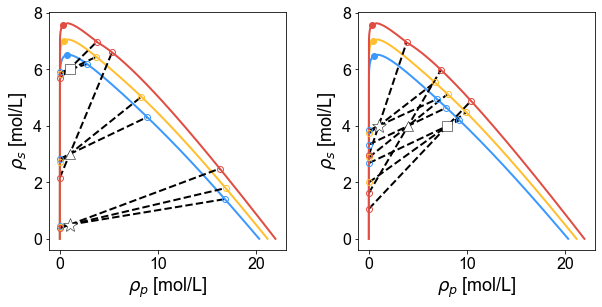

In [64]:
# Parameters
figsize = (9, 6)
colors = ['#3B99FE', '#FFBF2E', '#E04D43'] # blue, yellow, red
# fixed polymer concentration [mol/L]
rho_p_fixed = 1
# list of salt [KBr] concentrations [mol/L]
rho_s_varied = [0.5, 3.0, 6.0]
# fixed salt concentration [mol/L]
rho_s_fixed = 4
# list of polyanion [PSS] concentrations [mol/L]
rho_p_varied = [1.0, 4.0, 8.0]
# Temperature in Celsius?
T_cels = True
# square plot box?
square_box = True
# tolerance on Bjerrum length
tol = 0.003
# marker edge width
mew = 0.5

# list of Bjerrum lengths to plot
lB_list = [1.705, 1.865, 2.065]

# collects keyword arguments
kwargs = dict(colors=colors, sigma=sigma, T_cels=T_cels, square_box=square_box, mew=mew)


### Plots figure
fig = plot.fig3(data, lB_list, rho_p_fixed, rho_s_fixed, rho_p_varied, rho_s_varied,
            beads_2_M, kwargs, figsize=figsize)

# saves figure
plt.savefig(save_folder + 'figs2b.svg', bbox_inches='tight')

In [63]:
lB_list = [1.705, 1.865, 2.065]
print([pe.lB_2_T(lB, sigma=sigma) - 273.15 for lB in lB_list])

[1.8037770746360025, 50.422268774288625, 79.3643219434781]


## Vary N

Below we show the effect of the molecular weight on the binodal in the salt-temperature plane.

In [8]:
data_folder = 'salt/vary_params/'
mu_salt_folder = 'salt/mu_salt_100_chris/'
rho_s_M = 1.85
N_list = [100, 200, 400, 1000]
sigma = 4.1E-10 # [m]
ext = 'output.dat'
T_cels = True

data_vary_N = salt.binodal_vary_N_data(data_folder, mu_salt_folder, rho_s_M, N_list,
                        T_cels=T_cels, sigma=sigma, ext=ext, T_range=[273, 373])

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.



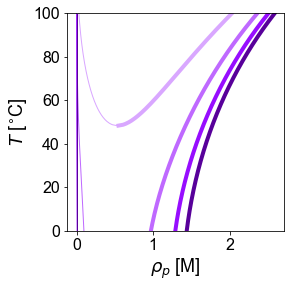

In [9]:
color_list = ['#D9A7FF', '#BF69FF', '#970DFF', '#58009A']# fainter, ['#D1A7FF', '#B080E4', '#772BCB', '#451975']

ax = plot.binodal_vary_N(data_vary_N, N_list, color_list, T_cels=T_cels)

## Vary f

In [10]:
data_folder = 'salt/n_100_chris/'
mu_salt_folder = 'salt/mu_salt_100_chris/'
rho_s_M = 1.4
f_list = [0.9, 0.95, 1]
ext = 'output.dat'
T_cels = True

data_vary_f = salt.binodal_vary_f_data(data_folder, mu_salt_folder, rho_s_M, f_list, 
                                       N=100, sigma=sigma, ext=ext, T_cels=T_cels)

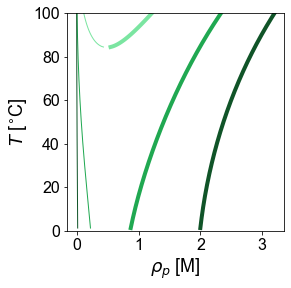

In [11]:
color_list = ['#7BE5A1', '#20A851', '#105428']

ax = plot.binodal_vary_f(data_vary_f, f_list, color_list, T_cels=T_cels)

## Vary sigma

$\rho_s$ = 1.2 M leads to bowed shape of binodal projection, which is phase-separated at all temperatures considered.

**Why does it get stuck???** Is it really that slow?

In [12]:
import salt
naming_structure = 'NA(100)NB(100)lB(*)'
ext = '.PD'
lB_lo = 1.3
lB_hi = 2.398

data_folder = 'salt/n_100/'

data = salt.load_data(data_folder, naming_structure=naming_structure,
                        lB_lo=lB_lo, lB_hi=lB_hi, ext=ext)

In [13]:
data_folder = 'salt/n_100/'
mu_salt_folder = 'salt/mu_salt_100/'
rho_s_M = 1
sigma_list = [4E-10, 4.3E-10, 4.6E-10, 4.9E-10]
ext = '.PD'
T_cels = True

data_vary_sigma = salt.binodal_vary_sigma_data(data, mu_salt_folder, 
                                               rho_s_M, sigma_list, N=100, ext=ext, T_cels=T_cels)

4e-10


C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



4.3e-10
4.6e-10
4.9e-10


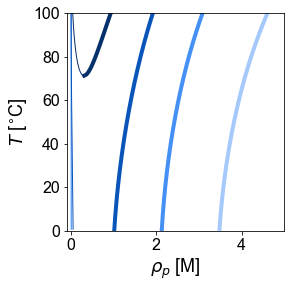

In [14]:
import plot

color_list = ['#A4C9FA', '#4590F5', '#0A55BA', '#06316A']
x_lim = [-0.1, 5]

ax = plot.binodal_vary_sigma(data_vary_sigma, sigma_list, color_list, T_cels=T_cels, x_lim=x_lim)

## Figure S3: Combine into One Figure the Effects of N, f, and $\sigma$

loading N data


C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.



plotting N data
loading f data
plotting f data
loading sigma data
4e-10


C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



4.3e-10
4.6e-10
4.9e-10
plotting sigma data


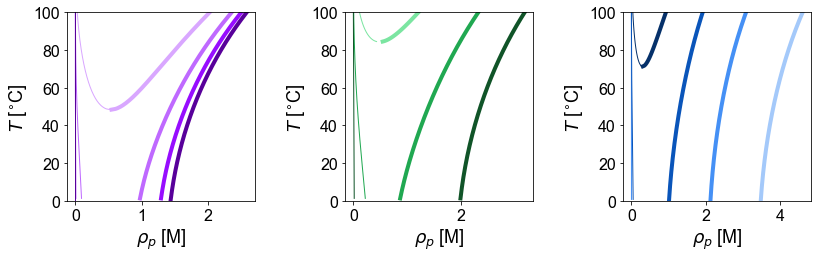

In [31]:
data_folder_N = 'salt/vary_params/'
data_folder_f = 'salt/n_100_chris/'
data_folder_sigma = 'salt/n_100/' # wider range of Bjerrum lengths, but only N = 100, f = 1
mu_salt_folder_N = 'salt/mu_salt_100_chris/'
mu_salt_folder_f = 'salt/mu_salt_100_chris/'
mu_salt_folder_sigma = 'salt/mu_salt_100/'
rho_s_M_N = 1.85 # [mol/L]
rho_s_M_f = 1.4 # [mol/L]
rho_s_M_sigma = 1 # [mol/L]
ext_N = 'output.dat'
ext_f = 'output.dat'
ext_sigma = '.PD'
N_list = [100, 200, 400, 1000]
f_list = [0.9, 0.95, 1]
sigma_list = [4E-10, 4.3E-10, 4.6E-10, 4.9E-10]
color_list_N =  ['#D9A7FF', '#BF69FF', '#970DFF', '#58009A']# fainter, ['#D1A7FF', '#B080E4', '#772BCB', '#451975']
color_list_f = ['#7BE5A1', '#20A851', '#105428']
color_list_sigma = ['#A4C9FA', '#4590F5', '#0A55BA', '#06316A']
sigma_fixed = 4.1E-10 # [m]
figsize = (12, 6)


figs3 = plot.figs3(data_folder_N, data_folder_f, data_folder_sigma,
        mu_salt_folder_N, mu_salt_folder_f, mu_salt_folder_sigma,
            rho_s_M_N, rho_s_M_f, rho_s_M_sigma, ext_N, ext_f, ext_sigma,
            N_list, f_list, sigma_list, color_list_N, color_list_f,
            color_list_sigma, sigma_fixed, figsize=figsize)

plt.savefig(save_folder + 'figs3.svg', bbox_inches='tight')

## Figure S4: UCST and LCST -- adds chi parameter

In [65]:
reload(salt)
### DATA PARAMETERS ###
# sets chi value (= chi/T)
chi = -160
# folder with binodal data
data_folder = 'salt/chi_chris_100/' # must contain mu in .PD file
# concentration of salt in reservoir [mol/L]
rho_salt_M = 2.62
# converts to beads/sigma^3
rho_salt = rho_salt_M/beads_2_M
# folder with chemical potential calculations for salt solution
mu_salt_folder = 'salt/mu_salt_100_chris/'
### FORMATTING PARAMETERS ###
# number of points to have in plot
n_pts = 100000
# parameter to plot for z axis
z_name = 'T [C]'
# binodal at fixed temperature
z_rough = 30
# range of Bjerrum lengths to plot
lB_lo = 1.7
lB_hi = 2.3
# index for critical point
i_cp = -2 # last line has some junk?
# fixed coordinates defining outlines of binodal surface
T_for_outline = [0, 101]
rho_s_for_outline = []
# sets bead size again [m]
sigma = 4.1E-10

quiet = False

# adjusts for different formatting of Chris's code's output from Pengfei's
naming_structure = 'NA(100)NB(100)lB(*)f(1.000)chi({0:d}.000)'.format(chi)
mu_naming_structure = 'NA(100)NB(100)lB(*)f(1.000)'
ext = 'output.dat'

In [66]:
# loads data--can skip if already loaded
data = salt.load_data(data_folder, ext=ext,
                lB_lo=lB_lo, lB_hi=lB_hi, naming_structure=naming_structure)

In [67]:
# computes data
data_3d, data_mu, data_z, \
data_cp, data_outlines = salt.data_fig1(data, mu_salt_folder, rho_salt, T_range, 
                                                    sigma, z_name, beads_2_M, n_pts, z_rough, 
                                                   lB_lo=lB_lo, lB_hi=lB_hi,
                                                     ext=ext, naming_structure=naming_structure, i_cp=i_cp, 
                                                   quiet=quiet, mu_naming_structure=mu_naming_structure,
                                       T_for_outline=T_for_outline, rho_s_for_outline=rho_s_for_outline)

Chemical potential = -1.799 outside of range for Bjerrum length = 1.818.
Chemical potential = -1.800 outside of range for Bjerrum length = 1.820.
Chemical potential = -1.801 outside of range for Bjerrum length = 1.822.
Chemical potential = -1.802 outside of range for Bjerrum length = 1.824.
Chemical potential = -1.803 outside of range for Bjerrum length = 1.826.
Chemical potential = -1.804 outside of range for Bjerrum length = 1.828.
Chemical potential = -1.805 outside of range for Bjerrum length = 1.830.
Chemical potential = -1.806 outside of range for Bjerrum length = 1.832.
Chemical potential = -1.807 outside of range for Bjerrum length = 1.834.
Chemical potential = -1.808 outside of range for Bjerrum length = 1.836.
Chemical potential = -1.809 outside of range for Bjerrum length = 1.838.
Chemical potential = -1.810 outside of range for Bjerrum length = 1.840.
Chemical potential = -1.811 outside of range for Bjerrum length = 1.842.
Chemical potential = -1.812 outside of range for Bj

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



In [69]:
################### PLOT ###################################
# parameters
fs = 14 # tick label font size
op = 0.005
ms_bin = 15
lw_bin = 30
lw_fix = 45
lw_crit = 30
lw_outline = 6

# colors
c1_T = 'blue'
c2_T = 'red'
c1_fix = 'blue'
c2_fix = 'red'
c_crit = 'black'
c_outline = '#1A2D4A'
mode = 'markers'
# figure size
width = 6000 # pixels
height = 5000 # pixels
# indicates which indices of Bjerrum lengths to skip
skip = []
# don't show axis labels, tick labels, or legend
show_labels = False

# coordinates of camera eye
eye_xyz = (1.5, 1.5, 1.5)

# offset of axes from true 0 (so they are not hidden by planes in background)
offset = 0.003

# Sets vertical axis limits
x_range = [-0.1, 7]
y_range = [0, 3]
z_range = [-1, 104]

plot_params = (x_range, y_range, z_range, eye_xyz, op, ms_bin, lw_bin, lw_fix, lw_crit, 
               lw_outline, c1_T, c2_T, c1_fix, c2_fix, c_crit, c_outline,
               mode, width, height, fs, offset)

############### PLOTTING ########################
fig = plot.fig1(data_3d, data_cp, data_z, data_mu, plot_params, 
                fixed_T=False, skip=skip, data_outlines=data_outlines, has_ucst=True, show_labels=show_labels)

# save_name = 'figs5_ucst_lcst_fixed_salt_chi_{0:d}.svg'.format(chi)

save_name = 'figs4.svg'

# saves figure
pio.write_image(fig, save_folder + save_name, width=width, height=height)

I saved one plot at $\chi = 0$ as `figs5_ucst_lcst_fixed_salt_chi_0.pdf` to compare with `fig1_lcst_fixed_salt_fixed_comp.pdf`, which was plotted under the same conditions, just having no $\chi$ parameter rather than a $\chi$ parameter of 0.